## import

In [28]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

## zipcodes

In [61]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head()

epsg:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


##type

In [30]:
type(zipcodes)

geopandas.geodataframe.GeoDataFrame

## zipcode 13 (37206)

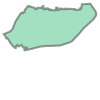

In [58]:
zipcodes.loc[13, 'geometry']

##print zip codes

In [59]:
print(zipcodes.loc[13, 'geometry'])

MULTIPOLYGON (((-86.753483032726 36.162740260244, -86.753830502754 36.162781587427, -86.754040663736 36.162883518048, -86.754237372706 36.163055354304, -86.754294725795 36.16314908244, -86.754527755658 36.163522926477, -86.754609714765 36.163770257537, -86.754648896063 36.163832421392, -86.755156715472 36.164688220988, -86.755224944878 36.16466216563, -86.756517680455 36.164159598154, -86.757031835403 36.163963904804, -86.757631570825 36.163732537014, -86.757614521237 36.163705778267, -86.757665106942 36.163689523129, -86.758127459493 36.163523164455, -86.758199076712 36.163643586233, -86.758270710901 36.163766204371, -86.758342348845 36.163888823013, -86.758491128124 36.164142816199, -86.758551738143 36.164245725109, -86.758623375548 36.16436834415, -86.758628879006 36.164377099608, -86.758694992154 36.164488764475, -86.758774823257 36.164617923736, -86.758852672268 36.164750648852, -86.758882331588 36.164737857895, -86.759306664201 36.164554856516, -86.75918918652 36.164373576405, -8

## plot

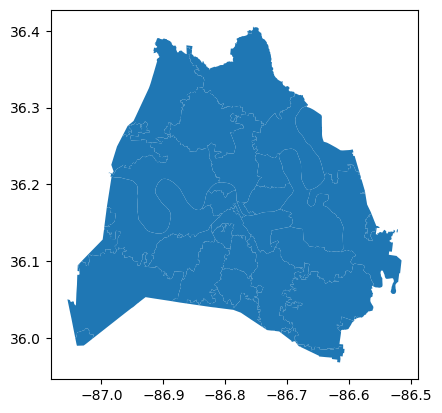

In [33]:
zipcodes.plot();

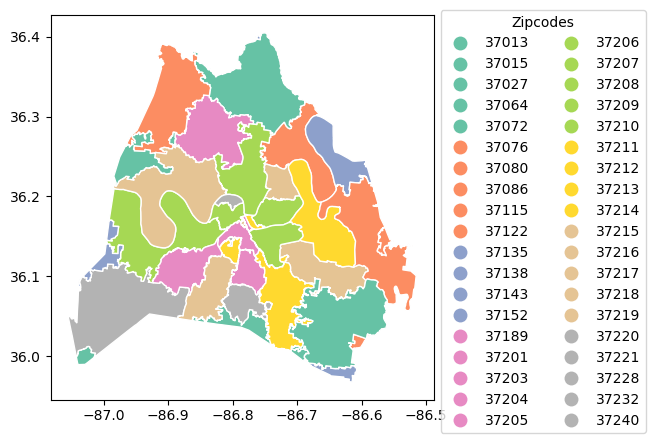

In [34]:
leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

zipcodes.plot(column = 'zip', figsize=(5, 5),
              edgecolor = 'white',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

## bike rack data

In [62]:
bikeracks = pd.read_csv('../data/BikeRacks.csv')
print(bikeracks.shape)
bikeracks.head(3)

(430, 13)


,the_geom,Type,OBJECTID,Domain,Status,IDNumber,Quantity,Location,Capacity,LON,LAT,Detail_Loc,Data_Colle
0,POINT (-86.65545277788499 36.049927777764),Rack,1,Public,Existing,113,1,Mall,12,-86.655453,36.049928,Hickory Hollow Mall,Health Dept
1,POINT (-86.63406252260494 36.185280037810095),Rack,2,Public,Existing,114,2,Greenway,4,-86.634063,36.185280,Stones River Greenway - Donelson/Hermitage Area,Health Dept
2,POINT (-86.62067056966654 36.1584215986261),Rack,3,Public,Proposed,256,0,Park/Greenway,0,-86.620671,36.158422,"Percy Priest Reservoir, Stones River Greenway",Health Dept


In [36]:
bikeracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   the_geom    430 non-null    object 
 1   Type        430 non-null    object 
 2   OBJECTID    430 non-null    int64  
 3   Domain      430 non-null    object 
 4   Status      430 non-null    object 
 5   IDNumber    430 non-null    int64  
 6   Quantity    430 non-null    int64  
 7   Location    430 non-null    object 
 8   Capacity    430 non-null    int64  
 9   LON         426 non-null    float64
 10  LAT         426 non-null    float64
 11  Detail_Loc  430 non-null    object 
 12  Data_Colle  430 non-null    object 
dtypes: float64(2), int64(4), object(7)
memory usage: 43.8+ KB


## spatial join

In [37]:
bikeracks['the_geom'] = bikeracks.apply(lambda x: Point((x.LON, 
                                                         x.LAT)), 
                                        axis=1)
bikeracks.head(3)

/Users/bryancolson/opt/anaconda3/envs/geospatial/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


,the_geom,Type,OBJECTID,Domain,Status,IDNumber,Quantity,Location,Capacity,LON,LAT,Detail_Loc,Data_Colle
0,POINT (-86.6554527779 36.0499277778),Rack,1,Public,Existing,113,1,Mall,12,-86.655453,36.049928,Hickory Hollow Mall,Health Dept
1,POINT (-86.6340625226 36.1852800378),Rack,2,Public,Existing,114,2,Greenway,4,-86.634063,36.185280,Stones River Greenway - Donelson/Hermitage Area,Health Dept
2,POINT (-86.6206705697 36.1584215986),Rack,3,Public,Proposed,256,0,Park/Greenway,0,-86.620671,36.158422,"Percy Priest Reservoir, Stones River Greenway",Health Dept


## .crs

In [38]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## geodata

In [39]:
bikeracks_geo = gpd.GeoDataFrame(bikeracks, 
                           crs = zipcodes.crs, 
                           geometry = bikeracks['the_geom'])

## type

In [40]:
type(bikeracks)

pandas.core.frame.DataFrame

In [41]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [42]:
bikeracks_by_zip = gpd.sjoin(bikeracks_geo, zipcodes, op = 'within')

/Users/bryancolson/opt/anaconda3/envs/geospatial/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3318: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


## bike racks by zip

In [43]:
bikeracks_by_zip['zip'].value_counts()

37203    51
37201    44
37206    36
37209    31
37219    29
37208    28
37207    21
37210    20
37211    17
37216    17
37013    16
37115    16
37214    15
37076    13
37218    10
37221    10
37228     8
37217     8
37212     7
37205     7
37213     5
37204     4
37215     3
37138     3
37220     3
37189     2
37080     1
37072     1
Name: zip, dtype: int64

## bike racks per zip

In [63]:
racks_in_37206 = bikeracks_by_zip.loc[bikeracks_by_zip['zip'] == '37206']
racks_in_37206.shape

(36, 17)

## polygon 37207 (shape)

In [64]:
polygon37206 = zipcodes.loc[zipcodes['zip'] == '37206']
polygon37206.shape

(1, 6)

## bike racks in 37206

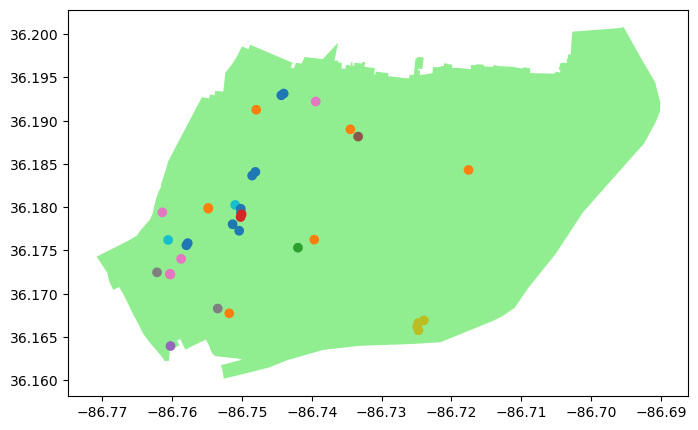

In [65]:
ax = polygon37206.plot(figsize = (8, 10), color = 'lightgreen')
racks_in_37206.plot( ax = ax, column = 'Location');
plt.show();

## polygon centroid

In [66]:
polygon37206.geometry.centroid

/var/folders/91/wchv5p25455f2k8078kdjvm40000gn/T/ipykernel_69876/4245166938.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37206.geometry.centroid


13    POINT (-86.73098 36.18090)
dtype: geometry

## center

In [68]:
center = polygon37206.geometry.centroid
print(center)

13    POINT (-86.73098 36.18090)
dtype: geometry


/var/folders/91/wchv5p25455f2k8078kdjvm40000gn/T/ipykernel_69876/2389381423.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37206.geometry.centroid


In [69]:
area_center = [center.y, center.x]
print(area_center)

[13    36.180897
dtype: float64, 13   -86.730983
dtype: float64]


map Nashville 37207

In [70]:
map_37206 = folium.Map(location =  area_center, zoom_start = 12)
map_37206

## Bike racks nashville

In [71]:
for row_index, row_values in racks_in_37207.iterrows():
    loc = [row_values['LAT'], row_values['LON']]
    pop = str(row_values['Location'])
    icon=folium.Icon(color="blue",icon="bike", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37206)
map_37206.save('../maps/map37207.html')
map_37206